## Examen Final - Mortalidad Materna
### Introducción

-La base de datos contiene información de los casos de defunción relacionados con la mortalidad materna, esta información es pública.

### Parte 1 - Presentación 

-Presenta tus resultados en una libreta de Jupyter de manera clara y concisa. Deberás explicar tu método de resolución, el algoritmo, las gráficas y/o DataFrame final y las conclusiones.

### Parte 2 - Preámbulo

- Presenta todo lo necesario para comenzar tu análisis de la información. Todo deberá estar comentado para que el usuario final y puede ser entendido

In [1]:
# Al inicio importo las librerias con las que trabajaremos:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importo la base de datos: Mortalidad, la cual llamare con el mismo nombre

Mortalidad=pd.read_csv("mortalidad.csv")

In [3]:
# Primer vista de los datos:

Mortalidad.head()

,Año de nacimiento,Mes de nacimiento,Descripción del mes de nacimiento,Día de nacimiento,Genero,Clave de la edad,Edad cumplida,Estado conyugal,Descripción del estado conyugal,Entidad de residencia,...,Mes de registro,Descripción del mes de registro,Día de registro,Año de la certificación,Mes de la certificación,Descripció del mes de la certificación,Día de la certificación,Año de la base de datos,Razón de mortalidad materna,Descrición de la razón de mortalidad materna
0,1972,6,JUNIO,25,2,A,29,5,CASADO,31,...,1,ENERO,20,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
1,1967,2,FEBRERO,1,2,A,35,5,CASADO,31,...,7,JULIO,28,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
2,1973,6,JUNIO,21,2,A,29,5,CASADO,31,...,10,OCTUBRE,24,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
3,1966,1,ENERO,23,2,A,36,5,CASADO,31,...,10,OCTUBRE,20,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
4,1975,0,NO ESPECIFICADO,0,2,A,30,5,CASADO,9,...,4,ABRIL,8,2005.0,4,ABRIL,8.0,2005,1,Muertes Maternas para la razón de Mortalidad M...


### Parte 3 - Análisis inicial 

- Nombre de los encabezados

In [4]:
list(Mortalidad.columns)

['Año de nacimiento',
 'Mes de nacimiento',
 'Descripción del mes de nacimiento',
 'Día de nacimiento',
 'Genero',
 'Clave de la edad',
 'Edad cumplida',
 'Estado conyugal',
 'Descripción del estado conyugal',
 'Entidad de residencia',
 'Descripción de entidad de residencia',
 'Municipio de residencia',
 'Descripción del municipio de residencia',
 'Localidad de residencia',
 'Descripión de la localidad de residencia',
 'Tamaño de localidad',
 'Descripción del tamaño de localidad',
 'Ocupación habitual',
 'Descripción de la ocupación habitual',
 'Escolaridad',
 'Descripción de la escolaridad',
 'Derechiahabiencia',
 'Descrición de la derechiahabiencia',
 'Entidad de ocurrencia',
 'Descripción de la entidad de ocurrencia',
 'Municipio de ocurrencia',
 'Descrición del municipio de ocurrencia',
 'Localidad de ocurrencia',
 'Descrición de la localidad de ocurrencia',
 'Sitio donde ocurrio la defunción',
 'Descripción del sitio donde ocurrio la defunción',
 'Año de la defunción',
 'Mes de la

- Muestra un DataFrame que contenga: Edad cumplida, Descripción del estado conyugal, Tamaño de localidad, Localidad de ocurrencia, Descrición de la localidad de ocurrencia

In [5]:
# Observamos el DataFrame original:

pd.DataFrame(Mortalidad)

,Año de nacimiento,Mes de nacimiento,Descripción del mes de nacimiento,Día de nacimiento,Genero,Clave de la edad,Edad cumplida,Estado conyugal,Descripción del estado conyugal,Entidad de residencia,...,Mes de registro,Descripción del mes de registro,Día de registro,Año de la certificación,Mes de la certificación,Descripció del mes de la certificación,Día de la certificación,Año de la base de datos,Razón de mortalidad materna,Descrición de la razón de mortalidad materna
0,1972,6,JUNIO,25,2,A,29,5,CASADO,31,...,1,ENERO,20,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
1,1967,2,FEBRERO,1,2,A,35,5,CASADO,31,...,7,JULIO,28,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
2,1973,6,JUNIO,21,2,A,29,5,CASADO,31,...,10,OCTUBRE,24,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
3,1966,1,ENERO,23,2,A,36,5,CASADO,31,...,10,OCTUBRE,20,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
4,1975,0,NO ESPECIFICADO,0,2,A,30,5,CASADO,9,...,4,ABRIL,8,2005.0,4,ABRIL,8.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
5,1975,0,NO ESPECIFICADO,0,2,A,30,5,CASADO,9,...,4,ABRIL,29,2005.0,4,ABRIL,29.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
6,1985,0,NO ESPECIFICADO,0,2,A,20,5,CASADO,15,...,5,MAYO,18,2005.0,5,MAYO,17.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
7,1978,7,JULIO,9,2,A,27,5,CASADO,15,...,10,OCTUBRE,9,2005.0,10,OCTUBRE,8.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
8,1958,9,SEPTIEMBRE,29,2,A,43,5,CASADO,32,...,1,ENERO,0,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
9,1970,5,MAYO,24,2,A,31,5,CASADO,32,...,4,ABRIL,0,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...


In [6]:
#Creamos una segunda bdd con solo las columnas que necesitamos: 
#Edad cumplida, Descripción del estado conyugal, Tamaño de localidad, Localidad de ocurrencia, Descrición de la localidad de ocurrencia

Mortalidad2=Mortalidad.drop(["Año de nacimiento", "Mes de nacimiento", "Descripción del mes de nacimiento", "Día de nacimiento", "Genero", "Clave de la edad", "Estado conyugal", 
                             "Entidad de residencia", "Descripción de entidad de residencia", "Municipio de residencia", "Descripción del municipio de residencia", 
                             "Localidad de residencia", "Descripión de la localidad de residencia", "Descripción del tamaño de localidad", "Ocupación habitual",
 'Descripción de la ocupación habitual',
 'Escolaridad',
 'Descripción de la escolaridad',
 'Derechiahabiencia',
 'Descrición de la derechiahabiencia',
 'Entidad de ocurrencia',
 'Descripción de la entidad de ocurrencia',
 'Municipio de ocurrencia',
 'Descrición del municipio de ocurrencia',
 'Sitio donde ocurrio la defunción',
 'Descripción del sitio donde ocurrio la defunción',
 'Año de la defunción',
 'Mes de la defunción',
 'Descrición del mes de la defunción',
 'Día de la defunción',
 'Hora de la defunción',
 'Minutos de la defunción',
 'Asistencia médica',
 'Descripción de la asistencia médica',
 'Causa CIE a  cuarto dígito',
 'Descrición de la causa CIE',
 'Quien certificó',
 'Descrición de quien certificó',
 'Entidad de registro',
 'Descrición de la entidad de registro',
 'Municipio de registro',
 'Descrición del municipio de registro',
 'Año de registro',
 'Mes de registro',
 'Descripción del mes de registro',
 'Día de registro',
 'Año de la certificación',
 'Mes de la certificación',
 'Descripció del mes de la certificación',
 'Día de la certificación',
 'Año de la base de datos',
 'Razón de mortalidad materna',
 'Descrición de la razón de mortalidad materna'], axis=1)


In [7]:
#Observamos los datos modificados

pd.DataFrame(Mortalidad2) 

,Edad cumplida,Descripción del estado conyugal,Tamaño de localidad,Localidad de ocurrencia,Descrición de la localidad de ocurrencia
0,29,CASADO,9,1,311020001 Valladolid
1,35,CASADO,9,1,310500001 Mérida
2,29,CASADO,4,1,310560001 Oxkutzcab
3,36,CASADO,1,1,310500001 Mérida
4,30,CASADO,0,0,090160000 No especificado
5,30,CASADO,0,0,090120000 No especificado
6,20,CASADO,12,0,150580000 No especificado
7,27,CASADO,15,1,150570001 Naucalpan de Juárez
8,43,CASADO,1,1,320170001 Guadalupe
9,31,CASADO,13,1,320560001 Zacatecas


-¿Cuántas edades diferentes tenían las madres cuando fallecieron? Obten los estadísticos para esta columna y los valores de las edades diferentes.

In [8]:
# Primero podemos visualizar los datos estadisticos de la Edad Cumplida
Mortalidad2.describe()

,Edad cumplida,Tamaño de localidad,Localidad de ocurrencia
count,17232.000000,17232.000000,17232.000000
mean,29.765727,7.823178,17.770195
std,36.916010,5.928247,102.275606
min,11.000000,0.000000,0.000000
25%,22.000000,2.000000,1.000000
50%,28.000000,6.000000,1.000000
75%,34.000000,14.000000,1.000000
max,998.000000,17.000000,3515.000000


- Imprime los valores de los años de defunción ¿ Existen datos que son lógicos, es decir, están correctos?

In [9]:
# Vemos los valores de las edades diferentes:

Mortalidad2["Edad cumplida"].unique()


array([ 29,  35,  36,  30,  20,  27,  43,  31,  39,  45,  42,  17,  38,
        26,  21,  22,  40,  44,  34,  41,  33,  13,  24,  25,  37,  19,
        23,  32,  28, 998,  15,  46,  48,  16,  18,  12,  47,  14,  51,
        50,  54,  49,  11,  53,  81,  70,  82,  59,  86,  65], dtype=int64)

In [10]:
print("En los datos, tenemos un registro de edad incorrecto que es 998")

En los datos, tenemos un registro de edad incorrecto que es 998


In [11]:
# Vemos la cantidad de edades diferentes:

len(Mortalidad["Edad cumplida"].unique())

50

In [12]:
## 1er conclusion: 

print("1er Conclusion: Podemos observar que la edad promedio en que las mujeres fallecen es de 29.77 años, tenemos 49 edades diferentes en los datos, que van de los 11 a los 86 años") , 

1er Conclusion: Podemos observar que la edad promedio en que las mujeres fallecen es de 29.77 años, tenemos 49 edades diferentes en los datos, que van de los 11 a los 86 años


(None,)

-¿Cuántos tipos de escolaridad existen? ¿Hay datos innecesarios o equivocados en la base de datos?

In [13]:
# Traemos los datos de la bdd original, ya que en la que creamos no colocamos esa columna
Mortalidad["Descripción de la escolaridad"].unique()


array(['PRIMARIA INCOMPLETA', 'SECUNDARIA INCOMPLETA', 'PROFESIONAL',
       'NINGUNA', 'SECUNDARIA COMPLETA', 'NO ESPECIFICADO', 'POSGRADO',
       'PRIMARIA COMPLETA', 'BACHILLERATO O PREPARATORIA COMPLETA',
       'BACHILLERATO O PREPARATORIA INCOMPLETA', 'NO ESPECIFICADO\r\n',
       'PREESCOLAR'], dtype=object)

In [14]:
len(Mortalidad["Descripción de la escolaridad"].unique())

12

In [15]:
print("2da Conclusion : Estan registrados 12 tipos de escolaridad, pero en realidad son 10, ya que hay datos innecesarios: NINGUNA Y NO ESPECIFICADO esta duplicado")

2da Conclusion : Estan registrados 12 tipos de escolaridad, pero en realidad son 10, ya que hay datos innecesarios: NINGUNA Y NO ESPECIFICADO esta duplicado


-¿Qué entidad tiene mayor número muertes?

In [16]:
# Primero veo cuales entidades hay en la lista
Mortalidad["Descripción de la entidad de ocurrencia"].unique()

array(['Yucatán', 'Distrito Federal', 'México', 'Zacatecas',
       'Baja California Sur', 'Guanajuato', 'Michoacán de Ocampo',
       'Veracruz de Ignacio de la Llave', 'Tabasco', 'Tamaulipas',
       'Chiapas', 'Nayarit', 'Guerrero', 'Puebla', 'Quintana Roo',
       'Oaxaca', 'Sonora', 'Querétaro Arteaga', 'Nuevo León', 'Sinaloa',
       'Chihuahua', 'San Luis Potosí', 'Hidalgo', 'Durango', 'Morelos',
       'Tlaxcala', 'Campeche', 'Coahuila de Zaragoza', 'Baja California',
       'Jalisco', 'Aguascalientes', 'Colima',
       'Estados Unidos de Norteamérica', 'Querétaro'], dtype=object)

In [17]:
# Y ahora cuantas entidades hay
len(Mortalidad["Descripción de la entidad de ocurrencia"].unique())

34

##  Parte 4 - Búsqueda de datos

- Imprime 2 DataFrames que sinteticen cierta información. Estos DataFrames deberán estar explicados con el contexto y el razón de porque son relevantes. Imprime solo el encabezado.

In [48]:
# En la primer DataFrame me parece importante ver la frecuencia de muertes por escolaridad de las mujeres, edad y entidad 

DT1=Mortalidad.drop(["Año de nacimiento", "Mes de nacimiento", "Descripción del mes de nacimiento", "Día de nacimiento", "Genero", "Clave de la edad", "Estado conyugal", 
                             "Entidad de residencia", "Descripción de entidad de residencia", "Municipio de residencia", "Descripción del municipio de residencia", 
                             "Localidad de residencia", "Descripión de la localidad de residencia", "Descripción del tamaño de localidad", "Ocupación habitual",
 'Descripción de la ocupación habitual',
 'Escolaridad',
 'Derechiahabiencia',
 'Descrición de la derechiahabiencia',
 'Entidad de ocurrencia',
  'Municipio de ocurrencia',
 'Descrición del municipio de ocurrencia',
 'Sitio donde ocurrio la defunción',
 'Descripción del sitio donde ocurrio la defunción',
 'Año de la defunción',
 'Mes de la defunción',
 'Descrición del mes de la defunción',
 'Día de la defunción',
 'Hora de la defunción',
 'Minutos de la defunción',
 'Asistencia médica',
 'Descripción de la asistencia médica',
 'Causa CIE a  cuarto dígito',
 'Descrición de la causa CIE',
 'Quien certificó',
 'Descrición de quien certificó',
 'Entidad de registro',
 'Descrición de la entidad de registro',
 'Municipio de registro',
 'Descrición del municipio de registro',
 'Año de registro',
 'Mes de registro',
 'Descripción del mes de registro',
 'Día de registro',
 'Año de la certificación',
 'Mes de la certificación',
 'Descripció del mes de la certificación',
 'Día de la certificación',
 'Razón de mortalidad materna',
 'Descrición de la razón de mortalidad materna', "Localidad de ocurrencia",
 'Descrición de la localidad de ocurrencia', "Tamaño de localidad"], axis=1)

In [49]:
#Data Frame 1

pd.DataFrame(DT1) 
DT1.head()

,Edad cumplida,Descripción del estado conyugal,Descripción de la escolaridad,Descripción de la entidad de ocurrencia,Año de la base de datos
0,29,CASADO,PRIMARIA INCOMPLETA,Yucatán,2002
1,35,CASADO,PRIMARIA INCOMPLETA,Yucatán,2002
2,29,CASADO,PRIMARIA INCOMPLETA,Yucatán,2002
3,36,CASADO,PRIMARIA INCOMPLETA,Yucatán,2002
4,30,CASADO,SECUNDARIA INCOMPLETA,Distrito Federal,2005


In [50]:
# Para el segundo data Frame quiero ver la Derechohabiencia de las mujeres fallecidas, asi como su estado conyugal y entidad de ocurrencia

DT2=Mortalidad.drop(["Año de nacimiento", "Mes de nacimiento", "Descripción del mes de nacimiento", "Día de nacimiento", "Genero", "Clave de la edad", "Estado conyugal", 
                             "Entidad de residencia", "Descripción de entidad de residencia", "Municipio de residencia", "Descripción del municipio de residencia", 
                             "Localidad de residencia", "Descripión de la localidad de residencia", "Descripción del tamaño de localidad", "Ocupación habitual",
 'Descripción de la ocupación habitual',
 'Escolaridad',
 'Derechiahabiencia',
 'Entidad de ocurrencia',
  'Municipio de ocurrencia',
 'Descrición del municipio de ocurrencia',
 'Sitio donde ocurrio la defunción',
 'Descripción del sitio donde ocurrio la defunción',
 'Año de la defunción',
 'Mes de la defunción',
 'Descrición del mes de la defunción',
 'Día de la defunción',
 'Hora de la defunción',
 'Minutos de la defunción',
 'Asistencia médica',
 'Descripción de la asistencia médica',
 'Causa CIE a  cuarto dígito',
 'Descrición de la causa CIE',
 'Quien certificó',
 'Descrición de quien certificó',
 'Entidad de registro',
 'Descrición de la entidad de registro',
 'Municipio de registro',
 'Descrición del municipio de registro',
 'Año de registro',
 'Mes de registro',
 'Descripción del mes de registro',
 'Día de registro',
 'Año de la certificación',
 'Mes de la certificación',
 'Descripció del mes de la certificación',
 'Día de la certificación',
 'Año de la base de datos',
 'Razón de mortalidad materna',
 'Descrición de la razón de mortalidad materna', "Localidad de ocurrencia",
 'Descrición de la localidad de ocurrencia', "Tamaño de localidad"], axis=1)


In [21]:
#Data Frame 2

pd.DataFrame(DT2) 
DT2.head()

,Edad cumplida,Descripción del estado conyugal,Descripción de la escolaridad,Descrición de la derechiahabiencia,Descripción de la entidad de ocurrencia
0,29,CASADO,PRIMARIA INCOMPLETA,NINGUNA,Yucatán
1,35,CASADO,PRIMARIA INCOMPLETA,NINGUNA,Yucatán
2,29,CASADO,PRIMARIA INCOMPLETA,NINGUNA,Yucatán
3,36,CASADO,PRIMARIA INCOMPLETA,NINGUNA,Yucatán
4,30,CASADO,SECUNDARIA INCOMPLETA,NINGUNA,Distrito Federal


In [22]:
Mortalidad["Descrición de la derechiahabiencia"].unique()

array(['NINGUNA', 'OTRA', 'IMSS', 'DERECHOHABIENCIA NO ESPECIFICADA',
       'SEGURO POPULAR', 'ISSSTE', 'IMSS Oportunidades',
       'SECRETARIA DE MARINA', 'SECRETARIA DE LA DEFENSA NACIONAL',
       'PEMEX'], dtype=object)

### Parte 5 - Información gráfica

- Realizar un análisis donde se necesite usar histogramas.

In [27]:
# Asigne la columna edad cumplida a una variable

Edad=DT2["Edad cumplida"]

# Cuento las edades diferentes
len(DT2["Edad cumplida"].unique())


50

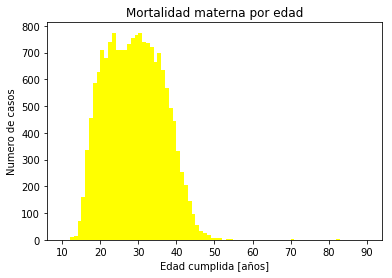

In [45]:
# Genero el Histograma

plt.hist(Edad,80, range=[10, 90], facecolor="yellow")
plt.xlabel("Edad cumplida [años]")
plt.ylabel("Numero de casos")
plt.title("Mortalidad materna por edad")
plt.show()

In [46]:
print("Conclusion: Se observa que la mayoria de los casos de mortalidad materna ocurren en mujeres de 30 años")

Conclusion: Se observa que la mayoria de los casos de mortalidad materna ocurren en mujeres de 30 años


-Realiza un analísis utilizando una gráfica de línea

In [58]:
#Año de la base de datos


- Realiza un análisis de la relación entre dos variables.